# Transformations of Space

We now make the jump from two to three dimensions. We generalize every notion we saw in the previous notebook, and consider several new ones. Our chief goal is the construction of rotation matrices. 

## Vectors and Orientation

We begin with the illustration of a vector $a=(a_x,a_y,a_z)$ in space with respect to a given right-handed orthogonal coordinate system $(e_x,e_y,e_z)$. **Orthogonal** means that the vectors are mutually perpendicular, while **right-handed** means that if, with your right hand, you align your index finger with $e_x$ and your middle finger with $e_y$ then your thumb will align with $e_z$.

We introduce the **spherical coordinates**

\begin{equation}\label{eq:scon}
  \eqalign{
  \theta &= \hbox{ polar angle } = \angle(e_z,a), \hskip 0.5in 0\le\theta<\pi \cr
  \phi &= \hbox{ azimuthal angle } = \angle(e_x,a^{\flat}), \hskip 0.5in 0\le\phi<2\pi \cr
  r &= \hbox{ magnitude } = \|a\| = \sqrt{a_x^2+a_y^2+a_z^2}, \cr}
\end{equation}

where $a^{\flat}=(a_x,a_y,0)$ is the flattening of $a$ into the $(e_x,e_y)$ plane. In these coordinates, our $a$ vector is expressed as

\begin{equation}\label{eq:ascon}
  \eqalign{
  a_x &= r\sin(\theta)\cos(\phi) \cr
  a_y &= r\sin(\theta)\sin(\phi) \cr
  a_z &= r\cos(\theta) \cr}
\end{equation}

and illustrated in Figure \ref{fig:ascon}.

<IPython.core.display.Javascript object>


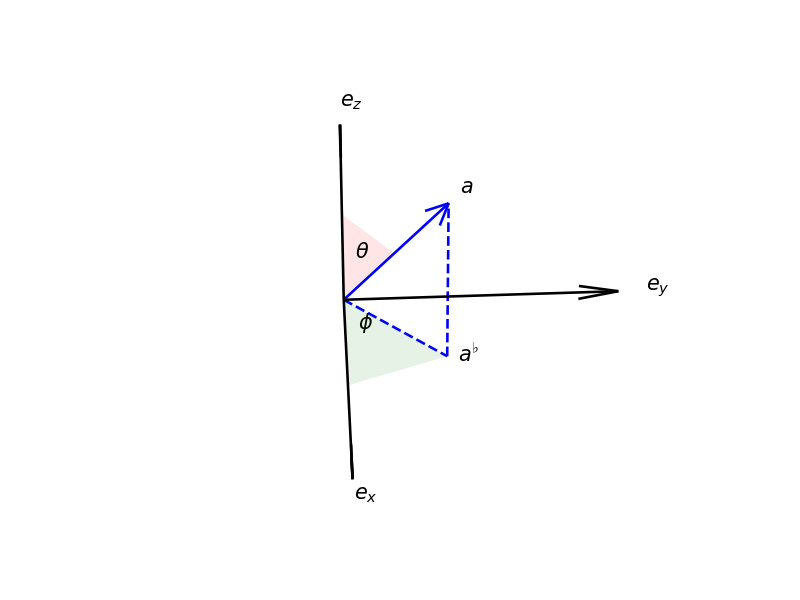

In [1]:
# spherical coordinates
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.15)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$a$', fontsize=12)

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$e_x$', fontsize=12)
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$e_y$', fontsize=12)
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$e_z$', fontsize=12)

ax.plot3D([0, x], [0, y], [0,0], 'b--')
ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$', fontsize=12)
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/8, y/8, z/3, '$\\theta$', fontsize=12)
ax.text3D(x/2, y/8, 0, '$\phi$', fontsize=12)

# paint the theta sector
Bx = [0, x/2, ez[0]/2]   
By = [0, y/2, ez[1]/2]    
Bz = [0, z/2, ez[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# paint the phi sector
Bx = [0, x, ex[0]/2]   
By = [0, y, ex[1]/2]    
Bz = [0, 0, ex[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.1))

ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(-0.5,1.5)

ax.axis('off')
plt.show()

\begin{myfig}\label{fig:ascon} Representation of $a\in\maR^3$ in terms of its **polar angle**, $\theta$, (pink span) **azimuthal angle**, $\phi$, (green span) and **magnitude**, $r$. Please rotate, zoom, and repeat. \end{myfig}

## Inner, outer, and cross products

To begin we note the **inner product** of two space vectors remains the sum of their element-wise products. That is

\begin{equation*}
  a^Tb = \begin{bmatrix} a[0] & a[1] & a[2] \end{bmatrix}\begin{bmatrix} b[0] \\ b[1] \\ b[2] \end{bmatrix}
    = a[0]b[0] + a[1]b[1] + a[2]b[2].
\end{equation*}

In addition, the norm of $a$ remains $\|a\|\equiv (a^Ta)^{1/2}$ and the inner product still obeys 

\begin{equation}\label{eq:CSE}
  a^Tb = \|a\|\|b\|\cos(\theta)
\end{equation}

where $\theta\equiv\angle(a,b)$ is the angle from $a$ and $b$.

The word **inner** here is used by contrast with the **outer product**

\begin{equation}\label{eq:OutProd}
     ab^T = \begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}\begin{bmatrix} b[0] & b[1] & b[2] \end{bmatrix}
     = \begin{bmatrix} a[0]b[0] & a[0]b[1] & a[0]b[2] \\ a[1]b[0] & a[1]b[1] & a[1]b[2] \\ a[2]b[0] & a[2]b[1] & a[2]b[2]
     \end{bmatrix}
\end{equation}

We will use both products throughout the remainder of our work. For our immediate needs we examine the outer product of a vector with itself. With $A=aa^T$ we find that

\begin{equation*}
   Ax = aa^Tx = a(a^Tx) = (a^Tx) a
\end{equation*}

and hence $Ax$ is simply a mutiple of $a$. We illustrate the vector $a$, and the plane perpendicular to it, in Figure \ref{fig:vperp} below.

\begin{exercise}\label{ex:rank1}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\|a\|=1$, then $A\equiv aa^T$ obeys $A^2=A$. In this case we say that
$A$ is a **projection** of $\maR^3$ onto the line through $a$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:rank1p}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\lVert a\rVert=1$, then $I-aa^T$ is a **projection** of $\maR^3$ onto the plane perpendicular to $a$. Here $I$ denotes the 3-by-3 identity matrix and so $(I-aa^T)x=x-(a^Tx)a$. A vector is perpendicular to $a$ when its
inner product with $a$ vanishes. Hence it remains only to take the inner product of $a$ and $x-(a^Tx)a$.
\end{exercise}

Your solution here.

We will exhibit two methods for displaying (finite sections) of infinite planes in python. The first, coded in the cell below, uses *meshgrid* to create a grid of planar points and then builds a plane as the height of a linear function of these grid points - where the linear function is built from the requirement that the plane be perpendicular to a given $a\in\maR^3$.

<IPython.core.display.Javascript object>


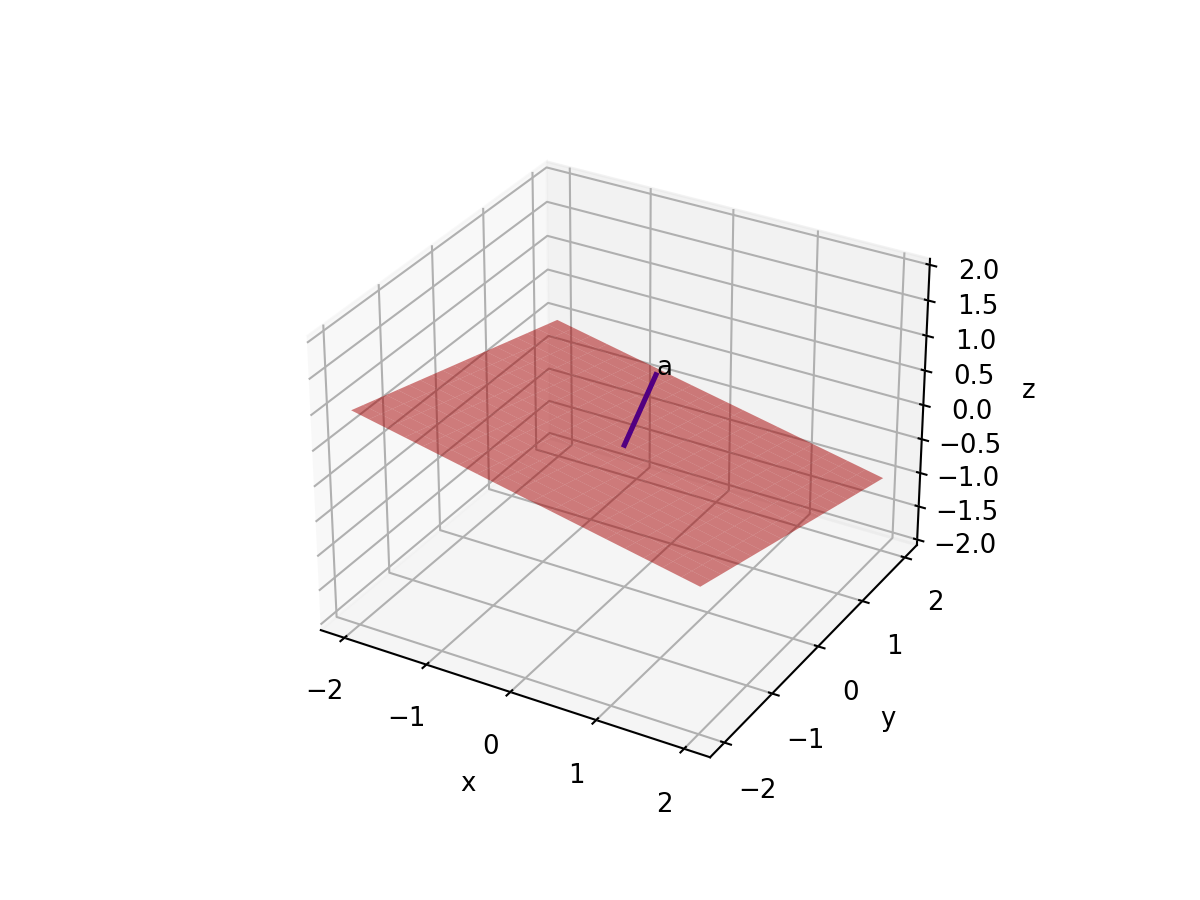

In [2]:
# plotting lines and planes
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square

Z = (-a[0]*X - a[1]*Y)/a[2]  # height of points on plane perpendicular to a

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2], 'a')                             # label the a vector
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')              # plot the plane perp to a

ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

\begin{myfig}\label{fig:vperp} A unit vector and its perpendicular plane. \end{myfig}

There is a third way of computing the product of two
vectors in $\maR^3$ that is especially important to studies of angular motion. The 
**cross product**  of $u$ and $v$ is written
$u\times v$ and defined as the matrix vector product


\begin{equation}\label{eq:Xdef}
  u\times v \equiv \ttX(u)v =
  \begin{pmatrix} 0 & -u_2 & u_1 \\
                  u_2 & 0 & -u_0 \\
                  -u_1 & u_0 & 0 \end{pmatrix}
  \begin{pmatrix} v_0 \\ v_1 \\ v_2 \end{pmatrix}
  = \begin{pmatrix} -u_2v_1 + u_1v_2 \\ u_2v_0-u_0v_2 \\ -u_1v_0+u_0v_1 
    \end{pmatrix}  
\end{equation}

The next two exercises develop the key properties of the cross product - as illustrated in Figure \ref{fig:crossp}.

\begin{exercise}\label{ex:CP0}
(a) Show that $u^T(u\times v)=0$ and $v^T(u\times v)=0$ and conclude that $u\times v$ is perpendicular to the plane containing $u$ and $v$.

(b) Confirm that $\ttX(u)^T=-\ttX(u)$ and that $\ttX(u)^2=uu^T-\|u\|^2I$.

(c) Use (b) to derive
$
  \|u\times v\|^2 = \|u\|^2\|v\|^2 - (u^Tv)^2.
$

(d) If $\theta=\angle(u,v)$ is the angle from $u$ to $v$ use (c) and (\ref{eq:CSE}) to show that
$
  \|u\times v\| = \|u\|\|v\||\sin\theta|.
$

(e) Use (d) and the figure below to conclude that 
$\|u\times v\|$
is the area (base times height) of the parallelogram with sides $u$ and $v$.

(f) Use (e) and the figure below to conclude that $|w^T(u\times v)|$
is the volume (area of base times height) of the parallelepiped with 
sides $u,\ v$ and $w$. Hint: Let $u$ and $v$ define the base. Then
$u\times v$ is parallel to the height vector obtained by drawing
a perpendicular from $w$ to the base.

(g) Based on our work in the previous notebook we note that this parallelepiped is the image of the unit cube by the transformation

\begin{equation}\label{eq:Auvw}
 A = [u, v, w] = \begin{bmatrix} u_0 & v_0 & w_0 \\ u_1 & v_1 & w_1 \\ u_2 & v_2 & w_2 \end{bmatrix}
\end{equation}

As this image has volume $|w^T(u\times v)|$, if the determinant indeed measures volume change (as it did in the plane) then 

\begin{equation}\label{eq:det3}
   \det(A)=w^T(u\times v)
\end{equation}

should tell us how to compute the determinant of $A$. Show that if $w$ is perpendicular to $u$ and $v$ then $\det([u,v,w])=c\|w\|^2$ for some $c\in\maR$. Show that $c>0$ when $w$ points in the same direction as $u\times v$, while $c<0$ when $w$ points opposite to $u\times v$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:cpdet3}
Given

\begin{equation*}
 u = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}
\end{equation*}

(a) Compute $u\times v$ by hand, via (\ref{eq:Xdef}), and check your work in python using np.cross(u,v)

(b) Compute $\det(A)$ by hand, via (\ref{eq:det3}), and check your work in python using np.linalg.det(A) and *A=np.column_stack((u,v,w))* to set up $A$.


\end{exercise}

Your solution here.

<IPython.core.display.Javascript object>


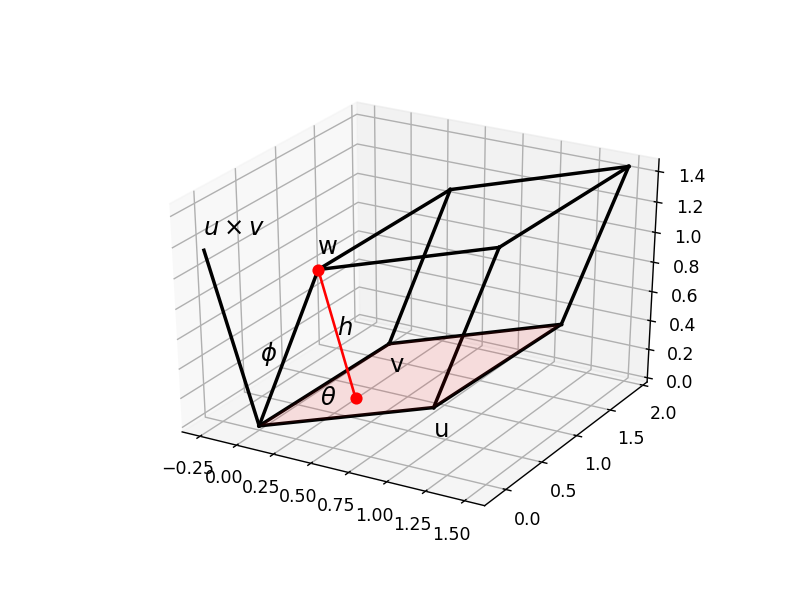

In [1]:
# cross product illustration
%matplotlib notebook
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")

x = np.array([1,1/3,1/4])

y = np.array([1/4,5/4,1/5])

xcy = np.cross(x.T,y.T);

z = x + y;

ax.plot3D([0, x[0]],[0, x[1]],[0, x[2]],'k',linewidth=2)

ax.text3D(x[0],x[1],x[2]-.2,'u',fontsize=14)
ax.text3D(y[0],y[1],y[2]-.2,'v',fontsize=14)
ax.text3D(0.2*z[0], 0.2*z[1], 0.2*z[2],'$\\theta$',fontsize=14)

ax.plot3D([0, y[0]],[0, y[1]],[0, y[2]],'k',linewidth=2)
ax.plot3D([y[0], z[0]],[y[1], z[1]],[y[2], z[2]],'k',linewidth=2)
ax.plot3D([x[0], z[0]],[x[1], z[1]],[x[2], z[2]],'k',linewidth=2)

ax.plot3D([0, xcy[0]],[0, xcy[1]],[0, xcy[2]],'k',linewidth=2)
ax.text3D(xcy[0],xcy[1],xcy[2]+.1,'$u\\times v$',fontsize=14)

w = np.array([1/4, 1/3, 1])
ax.plot3D([0, w[0]],[0, w[1]],[0, w[2]],'k',linewidth=2)
ax.text3D(w[0],w[1],w[2]+.1,'w',fontsize=14)
ax.plot3D([x[0], x[0]+w[0]],[x[1], x[1]+w[1]],[x[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0], y[0]+w[0]],[y[1], y[1]+w[1]],[y[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([z[0], z[0]+w[0]],[z[1], z[1]+w[1]],[z[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], x[0]+w[0]],[w[1], x[1]+w[1]],[w[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], y[0]+w[0]],[w[1], y[1]+w[1]],[w[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0]+w[0], z[0]+w[0]],[y[1]+w[1], z[1]+w[1]],[y[2]+w[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([x[0]+w[0], z[0]+w[0]],[x[1]+w[1], z[1]+w[1]],[x[2]+w[2], z[2]+w[2]],'k',linewidth=2)

# paint the base
Bx = [0, x[0], z[0], y[0]]   
By = [0, x[1], z[1], y[1]]    
Bz = [0, x[2], z[2], y[2]]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# project w onto [u,v] plane to draw height
A = np.column_stack((x,y))
q, res, rank, s = np.linalg.lstsq(A, w, rcond=0)
Pw = A@q
ax.plot3D([w[0], Pw[0]], [w[1], Pw[1]], [w[2], Pw[2]], 'ro-')
m = (w+Pw)/2
ax.text3D(m[0], m[1], m[2], '$h$', fontsize=14)

#  build and label phi
p = 0.2*(xcy + w)
ax.text3D(p[0], p[1], p[2], '$\phi$', fontsize=14);


\begin{myfig}\label{fig:crossp} The geometry of the cross product. Here $\theta=\angle(u,v)$ and we note that $u\times v$ is perpendicular to the plane defined by $u$ and $v$. The actual *direction* of $u\times v$ is uniquely specified by the **right hand rule:** If, on your right hand, $u$ aligns with your index finger, $v$ with your middle finger, then $u\times v$ will align with your thumb. To facilitate the computation of volume of the parallelpiped we have shaded the base (light red), illustrated the height, $h$, and denoted by $\phi$ the angle between $w$ and $u\times v$. \end{myfig}

From the figure caption above and Exercise \ref{ex:CP0}(g) we deduce a criterion for right-handedness that will be very useful in coming sections.

\begin{proposition}\label{prop:frameOri} If $(u,v,w)$ is a collection of three vectors in $\maR^3$ and $w$ is perpendicular to both $u$ and $v$ then $(u,v,w)$ obeys the right-hand-rule if, and only if, $\det([u,v,w])>0$.
\end{proposition}

In the planar case, where the matrix $M=[u,v]$ expressed in terms of columns, we noted that $\det(M)$ vanished only $u$ and $v$ are colinear. In moving to our space setting, where $A=[u,v,w]$ we note from (\ref{eq:det3}) that $u\times v\ne 0$ if $u$ and $v$ are not colinear. If $u\times v\ne 0$ and it is perpendicular to the plane containing $u$ and $v$. As such, if $w$ does not lie in this plane then $w^T(u\times v)\ne 0$. Hence, if $u$ is not a multiple of $v$ and $w$ is not a linear combination of $u$ and $v$ then $\det([u,v,w])\ne 0$. These conditions on $u$, $v$, $w$ are more succinctly expressed in terms of 

\begin{definition}\label{def:LI}
We say that three vectors, $u$, $v$, $w$ in $\maR^3$ are **linearly independent** when the only numbers $c_0$, $c_1$, $c_2$ for which

\begin{equation}\label{eq:LI1}
  c_0u + c_1v + c_2w = 0
\end{equation}

is the triple of zeros $c_0=c_1=c_2=0$. If we lay these vectors into columns of $A=[u,v,w]$, and group the scalars into the column $c=[c_0,c_1,c_2]$ we notice that as $c_0u + c_1v + c_2w = Ac$ we arrive at the equivalent condition; $u$, $v$, $w$ in $\maR^3$ are **linearly independent** in $\maR^3$ when

\begin{equation}\label{eq:LI2}
  \hbox{the only } c \hbox{ for which } Ac=0 \hbox{ is the vector } c=0.
\end{equation}

Finally, given the discussion that prompted this definition, we arrive at the third equivalent condition; $u$, $v$, $w$ in $\maR^3$ are **linearly independent** in $\maR^3$ when

\begin{equation}\label{eq:LI3}
 \det([u,v,w]) \ne 0
\end{equation}

\end{definition}

\begin{exercise}\label{ex:LDex}
Use (\ref{eq:LI3}) and (\ref{eq:det3}) to determine whether or not 

\begin{equation*}
u = \begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix}
\end{equation*}

are linearly independent.
\end{exercise}

## Rotations

To prepare for rotations in space we consider the planar rotations of the previous notebook from a more analytical viewpoint.  In particular, with reference to Figure \ref{fig:rot2}, we observe that

\begin{equation} \label{eq:xycirc}
  x_0(\theta) = r\cos(\theta), \\
  x_1(\theta) = r\sin(\theta)
\end{equation}

traces out a circle of radius $r$ in the $(x_0,x_1)$ plane as $\theta$ travels from 0 to $2\pi$. On differentiating this pair with respect to $\theta$ we arrive at the tangent vector with components

\begin{equation} \label{eq:circtan}
  x'_0(\theta) = -r\sin(\theta), \\
  x'_1(\theta) = r\cos(\theta)
\end{equation}

This vector is most naturally illustrated when translated to the point at which it is tangent.

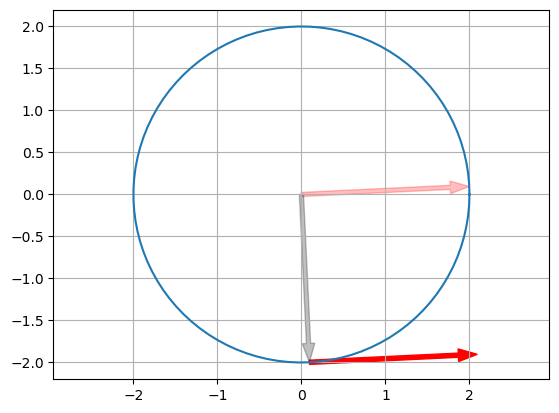

In [5]:
# planar rotation with tangent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi,100)
r = 2

x0 = r*np.cos(theta)
x1 = r*np.sin(theta)
plt.plot(x0, x1)

dx0 = -r*np.sin(theta)
dx1 = r*np.cos(theta)

m = np.random.randint(100)  

plt.arrow(x0[m], x1[m], dx0[m], dx1[m], width=0.05, color='r', length_includes_head=True)
plt.arrow(0, 0, dx0[m], dx1[m], width=0.05, color='r', alpha=0.25, length_includes_head=True)
plt.arrow(0, 0, x0[m], x1[m], width=0.05, color='k', alpha=0.25, length_includes_head=True)
plt.grid('on')
plt.axis('equal')
plt.show()

\begin{myfig}\label{fig:rot2} At a random point, $x$ in gray, on the blue circle we graph the tangent vector, $x'$, in light red, and it's parallel translate in dark red. Rerun to see new tangent.\end{myfig}

\begin{exercise}\label{ex:gtan}
Regarding (\ref{eq:xycirc}) and (\ref{eq:circtan}), please confirm that $\|x(\theta)\|=r$, and $\|x'(\theta)\|=r$ and $x^T(\theta)x'(\theta)=0$ for each $0\le\theta <2\pi$.
\end{exercise}

This exercise and Figure \ref{fig:rot2} indicate that $x'$ is simply rotation of $x$ by $\pi/2$, i.e.,

\begin{equation}\label{eq:rot2b}
  x'(\theta) = Sx(\theta), \where S = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}
\end{equation}

We solve this differential equation by analogy with the scalar case. In particular, as the solution to $y'(t)=5y(t)$ is $y(t)=\exp(5t)y(0)$, we expect the solution of (\ref{eq:rot2b}) to be

\begin{equation}\label{eq:rot2c}
  x(\theta) = \exp(\theta S)x(0)
\end{equation}

where

\begin{equation}\label{eq:TayExp}
   \exp(\theta S) = I + \theta S + (\theta S)^2/2! + (\theta S)^3/3! + (\theta S)^4/4! + (\theta S)^5/5! + \cdots
\end{equation}

where $I$ is the 2-by-2 identity matrix. This looks complicated, until you realize that $S$ has very tame powers.

\begin{exercise}\label{ex:S2pow}
Please show that
\begin{equation*}
  S^{2m-1} = (-1)^{m+1}S  \and S^{2m} = (-1)^mI \hskip 0.25in m=1,2,\ldots
\end{equation*}
and deduce that
\begin{equation*}
  \eqalign{
   \exp(\theta S) &= I + \theta S - \theta^2 I/2! - \theta^3 S/3! + \theta^4 I/4! + \theta^5 S/5! + \cdots \cr
      &= (1 - \theta^2/2! + \theta^4/4! - \cdots)I + (\theta - \theta^3/3! + \theta^5/5! - \cdots)S \cr
      &= \cos(\theta)I + \sin(\theta)S \cr
      &= K(\theta) \hskip{0.25in}\hbox{from our previous notebook.}\cr}
\end{equation*}
\end{exercise}

To **recap**, our return to planar rotations has revealed that 

\begin{equation}\label{eq:expS2}
  \boxed{K(\theta)=\exp(\theta S)}
\end{equation}

where $S$ is the matrix that transforms points to tangents along the circle of rotation. This will be our clue to exploring rotations in space. Given a unit vector $a\in\maR^3$ and vector $x\in\maR^3$ we illustrate in Figure \ref{fig:3drot} the counterclockwise rotation of $x$ about $a$ by angle $\theta$, together with its translated tangent vector.

<IPython.core.display.Javascript object>


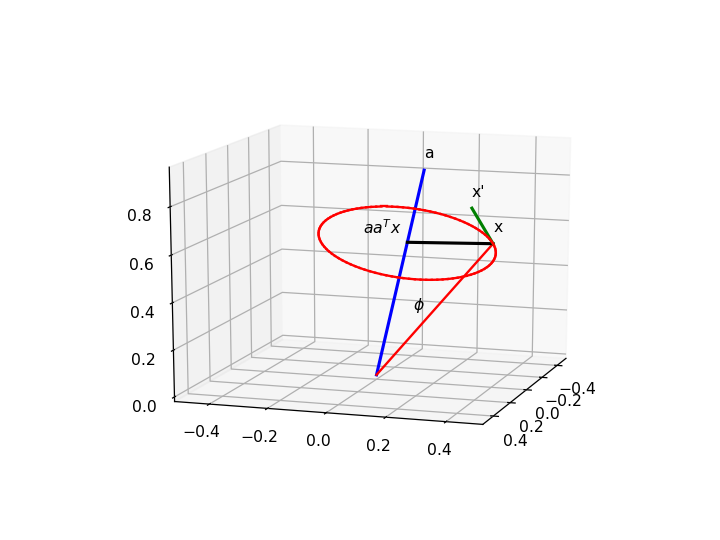

In [6]:
# an illustration of rotation about an axis
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev = 14, azim = 18)

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
A = np.outer(a,a)
I = np.eye(3)
X = np.array([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])   # the cross product matrix

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2]+0.05, 'a')                             # label the a vector

x = np.array([0,2,3])/5
ax.plot3D([0, x[0]], [0, x[1]], [0, x[2]],'r')   # plot the x vector
ax.text3D(x[0], x[1], x[2]+.05, 'x')                             # label the x vector

Ax = A@x
ax.plot3D([Ax[0], x[0]], [Ax[1], x[1]], [Ax[2], x[2]], 'k',linewidth=2)   # plot the A*x vector
ax.text3D(Ax[0], Ax[1]-.15, Ax[2]+0.025, '$aa^Tx$')   # label the A*x vector

dx = np.cross(a, x)
ax.plot3D([x[0], x[0]+dx[0]], [x[1], x[1]+dx[1]], [x[2], x[2]+dx[2]], 'g',linewidth=2)   # plot the dx vector
#ax.arrow3D(x[0], x[1], x[2], dx[0], dx[1], dx[2], width=0.05, color='g', length_includes_head=True)   # plot the dx vector
ax.text3D(x[0]+dx[0], x[1]+dx[1], x[2]+dx[2]+0.05, "x'")   # label the dx vector

p = (Ax + x)/4
ax.text3D(p[0], p[1], p[2], '$\phi$')   # label phi

Theta = np.linspace(0,2*np.pi,100)

y = x  # temp storage

for theta in Theta:
    K = A + np.sin(theta)*X + np.cos(theta)*(I-A)    # the rotation matrix
    newy = K@x
    ax.plot3D([y[0], newy[0]], [y[1], newy[1]], [y[2], newy[2]],'r')   # connect old to new
    y = newy

ax.grid('on')
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5);

\begin{myfig}\label{fig:3drot} An axis defined by a blue unit vector, $a$. We choose a red vector $x$ that makes the angle $\phi$ with $a$. We rotate $x$ about $a$ and trace out the red circle centered at $aa^Tx$ (the projection of $x$ onto $a$).
At $x$ we also plot the black normal (radial) vector to the circle and the green tangent vector, $x'$. \end{myfig}

We learn from this figure that the tangent vector, $x'$, is perpendicular to the plane spanned by $a$ and $x$, obeys the right-hand-rule, and that its length is $\|x\|\sin(\phi)$. As such, the tangent vector at $x$ is the cross product of $a$ and $x$. That is,

\begin{equation*}
  x'(\theta) = a\times x = X(a)x
\end{equation*}

and **so $X(a)$ is the matrix that transforms points to tangents during a rotation.** Based on (\ref{eq:expS2}) we therefore expect the associated rotation matrix to be

\begin{equation*}
  K(a,\theta) \equiv \exp(\theta X(a)) = I + \theta X(a) + (\theta X(a))^2/2 + (\theta X(a))^3/3! + (\theta X(a))^4/4! + \cdots
\end{equation*}

Now, thanks to Exercise \ref{ex:CP0} we know that powers of $X(a)$ divide neatly between even and odd that in turn reveal $\sin(\theta)$ and $\cos(\theta)$.

\begin{exercise}\label{ex:expXa}
Please show that
\begin{equation*}
  X(a)^{2m-1} = (-1)^{m+1}X(a) \and X(a)^{2m} = (-1)^m(I - aa^T) \hskip 0.25in m=1,2,\ldots
\end{equation*}
and so
\begin{equation*}
  K(a,\theta) = \exp(\theta X(a)) 
  = I + \sin(\theta)X(a) + (\cos(\theta)-1)(I-aa^T) 
  = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)
\end{equation*}
\end{exercise}

This deserves a box. The counterclockwise rotation by $\theta$ about the unit-length axis $a\in\maR^3$ is

\begin{equation}\label{eq:Kat}
  \boxed{K(a,\theta) = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)}
\end{equation}


Let us produce these matrices when $a$ is one of the coordinate axes

\begin{equation}\label{eq:eCart}
 e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:Rot3euc}
Please confirm that

\begin{equation}\label{eq:Kax}
 K(e_x,\theta) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_y,\theta) = \begin{bmatrix} 
         \cos(\theta) & 0 & \sin(\theta) \\  0 & 1 & 0 \\ -\sin(\theta) & 0 & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_z,\theta) = \begin{bmatrix} 
       \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

and in each case show that its determinant, via Equation \ref{eq:det3}, is 1 and its trace is $1+2\cos\theta$.

\end{exercise}

Your solution here.

These coordinate rotations, (\ref{eq:Kax}), indeed have the look of the planar rotations of our previous notebook. Let's now show that $K(a,\theta)$ indeed leaves $a$ unmolested, that its transpose reverses the rotation, that composite rotations correspond to sums of angles,
and that it preserves length (norm) and angle (with respect to $a$).


\begin{exercise}\label{ex:Rot3a}
Use Exercise (\ref{ex:CP0}) to conclude that 

(i) $K(a,\theta)a = a$

(ii) $K(a,\theta)^T = K(a,-\theta)$

(iii) $K(a,\theta)K(a,\phi)=K(a,\theta+\phi)$

(iv) $\|K(a,\theta)x\| = \|x\|$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(v) $\angle(a,x)=\angle(a,K(a,\theta)x)$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(vi) $K'(a,\theta)=X(a)K(a,\theta)$ where prime, as above, denotes $d/d\theta$.
\end{exercise}

Your solution here.

We could "see" the trace of each coordinate rotation, (\ref{eq:Kax}), without trouble, and found it to be independent of direction. Using $\|a\|=1$ and that the trace of a sum is the sum of the traces please use (\ref{eq:Kat}) to

\begin{exercise}\label{ex:trKa} Show that $\tr(K(a,\theta))=1+2\cos(\theta)$
\end{exercise}

Your solution here.

Although we could also see that the determinant of each coordinate rotation, (\ref{eq:Kax}), was 1, the form of $K(a,\theta)$ as the sum (\ref{eq:Kat}), is not conducive to evaluation of the determinant. Recalling, from our previous notebook, that the determinant of a product is the product of determinants we now show  that $K(a,\alpha)$ can be written as a product of coordinate rotations. 

Returning to Figure \ref{fig:ascon} we write the axis, $a$, in spherical coordinates

\begin{equation}\label{eq:asc}
  a = \begin{bmatrix}\sin(\theta)\cos(\phi) \\ \sin(\theta)\sin(\phi) \\ \cos(\theta) \end{bmatrix}
\end{equation}

and reason that to achieve $K(a,\alpha$) we

\begin{itemize}
\item rotate $a$ onto $e_z$ (rotate $a$ around $e_z$ by $-\phi$, then rotate around $e_y$ by $-\theta$)
\item rotate around $e_z$ by $\alpha$
\item undo the initial transformation, i.e, rotate around $e_y$ by $\theta$, then rotate around $e_z$ by $\phi$.
\end{itemize}

In symbols, this reads; rotation about an axis $a$ of the form (\ref{eq:asc}) is achieved by

\begin{equation}\label{eq:K5}
  \boxed{K(a,\alpha) = K(e_z,\phi)K(e_y,\theta)K(e_z,\alpha)K(e_y,-\theta)K(e_z,-\phi)}
\end{equation}

That is, every rotation in space is the product of (at most) five coordinate rotations. As each coordinate rotation preserves volume, so too must their composition. As $\det(M)$ is the multiplier by which $M$ volume changes, it follows that the determinant of every rotation is one, i.e.,

\begin{equation}\label{eq:detK}
  \det(K(a,\theta)) = 1
\end{equation}

for each unit axis $a$ and angle $\theta$.

\begin{exercise}\label{ex:rot2way} With $\theta=\phi=\pi/4$ we find $a=[1/2,1/2,1/\sqrt 2]$. 

(a) Compute $K(a,\alpha)$ via (\ref{eq:Kat}) and (\ref{eq:K5}) and confirm their identity.

(b) Next use (\ref{eq:det3}) to confirm that $\det(K(a,\alpha)) = 1$.
\end{exercise}

Your solution here.

Our next application of rotations will be to map one right-handed **orthonormal** frame, $(f_x,f_y,f_z)$, to another, $(f_1,f_2,f_3)$. By orthonormal we mean the the three vectors are each unit vectors, and each is perpendicular to the other two. We illustrate these two frames in Figure \ref{fig:EulerAngles}.

<IPython.core.display.Javascript object>


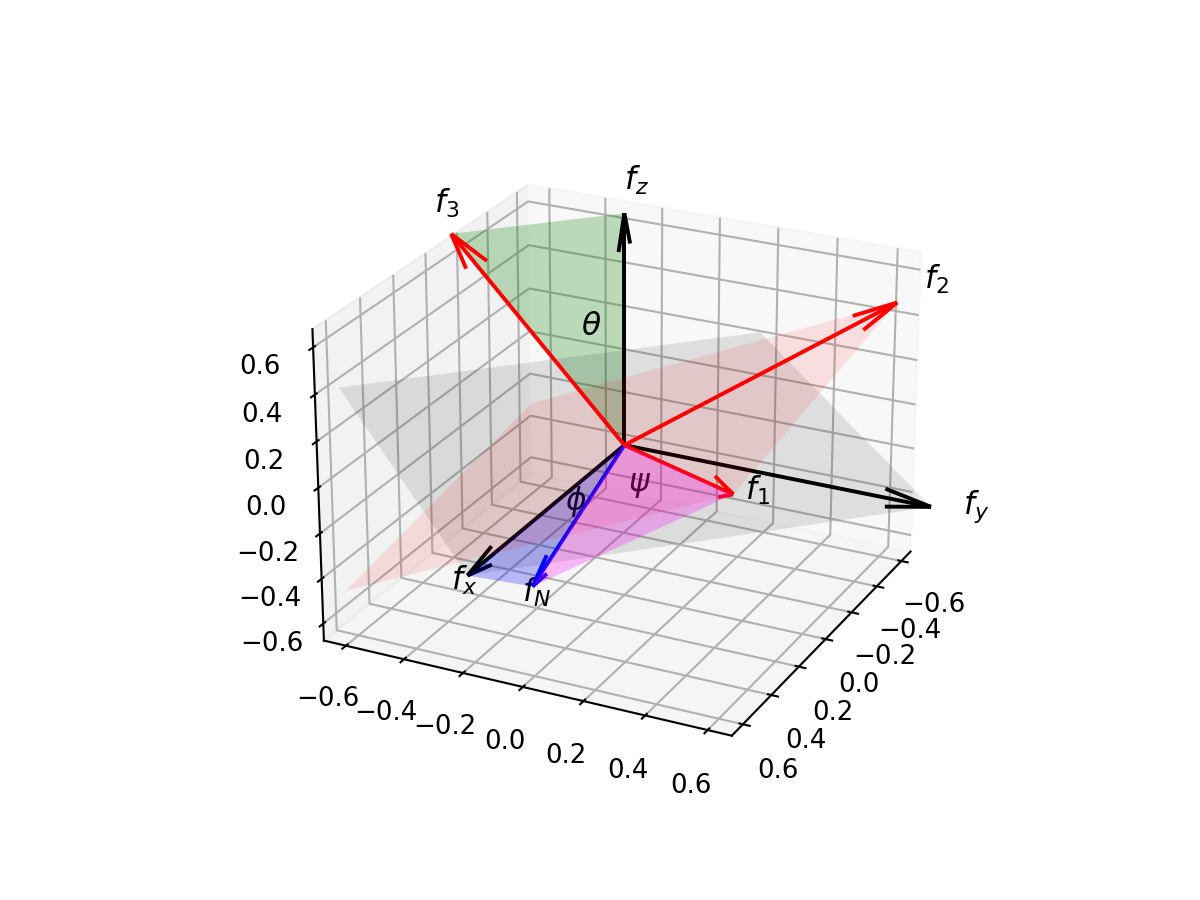

C:\Users\steve\AppData\Local\Temp\ipykernel_9060\64475562.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [3]:
# transformation of frames
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

fig = plt.figure(' ')
ax = fig.gca(projection='3d')

fx = np.array([1,0,0])
fy = np.array([0,1,0])
fz = np.array([0,0,1])

F1 = ax.quiver([0,0,0],[0,0,0],[0,0,0],fx,fy,fz, colors='k', arrow_length_ratio=.15)

# create the e plane 
x = [fx[0], fy[0], -fx[0], -fy[0]]   
y = [fx[1], fy[1], -fx[1], -fy[1]]   
z = [fx[2], fy[2], -fx[2], -fy[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'k', alpha = 0.1))

tfx = 1.1*fx
ax.text3D(tfx[0], tfx[1], tfx[2], '$f_x$', fontsize=12)
tfy = 1.1*fy
ax.text3D(tfy[0], tfy[1], tfy[2], '$f_y$', fontsize=12)
tfz = 1.1*fz
ax.text3D(tfz[0], tfz[1], tfz[2], '$f_z$', fontsize=12)

f1 = np.array([1,1,0.5])/np.sqrt(2.25)
f2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
f3 = np.cross(f1, f2)
f3 = f3 / np.linalg.norm(f3)

F2 = ax.quiver([0,0,0],[0,0,0],[0,0,0],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], colors='r', arrow_length_ratio=.15)

# create the f plane 
x = [f1[0], f2[0], -f1[0], -f2[0]]   
y = [f1[1], f2[1], -f1[1], -f2[1]]   
z = [f1[2], f2[2], -f1[2], -f2[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor='r', alpha = 0.1))

tf1 = 1.1*f1
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$', fontsize=12)
tf2 = 1.1*f2
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$', fontsize=12)
tf3 = 1.1*f3
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$', fontsize=12)

fN = np.cross(fz, f3)
fN = fN / np.linalg.norm(fN)
F3 = ax.quiver(0,0,0,fN[0], fN[1], fN[2], colors='b', arrow_length_ratio=.15)
tfN = 1.1*fN
ax.text3D(tfN[0], tfN[1], tfN[2], '$f_N$', fontsize=12)

# create the theta span
x = [0, f3[0], fz[0]]  
y = [0, f3[1], fz[1]]  
z = [0, f3[2], fz[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.25))
f3z = (f3 + fz)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\\theta$', fontsize=12)

# create the phi span
x = [0, fx[0], fN[0]]  
y = [0, fx[1], fN[1]]  
z = [0, fx[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.25))
f3z = (fx + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\phi$', fontsize=12)

# create the psi span
x = [0, f1[0], fN[0]]  
y = [0, f1[1], fN[1]]  
z = [0, f1[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = [1,0,1], alpha = 0.25))
f3z = (f1 + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\psi$', fontsize=12)

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
ax.set_zlim3d([-1.25, 1.25])
plt.show()

\begin{myfig}\label{fig:EulerAngles} Transformation of the given frame $(f_x, f_y, f_z)$ into the target frame $(f_1,f_2,f_3)$.
Please rotate and zoom to explore the three angles between the two frames. The black $(f_x,f_y)$ plane intersects the red $(f_1,f_2)$ plane along the blue
$f_N = f_z\times f_3/\Vert f_z\times f_3\Vert$ direction. We denote by $\phi$ the angle from $f_x$ to $f_N$ looking down $f_z$. We paint this span blue and note, as $f_x$ and $f_N$ lie in the black plane,  that

\begin{equation}\label{eq:EA1}
  f_N = K(f_z,\phi)f_x
\end{equation}

We next denote by $\theta$ the angle from $f_z$ to $f_3$ looking down $f_N$. We paint this span green and note that

\begin{equation}\label{eq:EA2}
  f_3 = K(f_N,\theta)f_z
\end{equation}

We finally denote by $\psi$ the angle from $f_N$ to $f_1$ looking down $f_3$. We paint this span purple and note, as $f_N$ and $f_1$ lie in the red plane, that

\begin{equation}\label{eq:EA3}
  f_1 = K(f_3,\psi)f_N
\end{equation}

\end{myfig}

We collect these individual rotations into the composite

\begin{equation}\label{eq:EATot}
  \cK \equiv K(f_3,\psi)K(f_N,\theta)K(f_z,\phi)
\end{equation}

and establish that $\cK$ indeed transforms $(f_x,f_y,f_z)$ to $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:EA0} (a) Please confirm that $\cK f_x=f_1$ and $\cK f_z = f_3$. 

(b) Please use $(AB)^T=B^TA^T$ and Exercise \ref{ex:Rot3a} to deduce that $\cK^T\cK = I$.

(c) Use (b) to show that  $\cK f_y$ is a unit vector perpendicular to **both** $f_1$ and $f_3$ and so can only be $f_2$ or $-f_2$. Use Proposition \ref{prop:frameOri} to rule out the latter option.

\end{exercise}

Your solution here.

For our work in robotics we will need to automate the generation of the frame transformer in (\ref{eq:EATot}). The only nonstandard part of the calculation lies in the computing the angles between two vectors while looking down a third vector. To quantify this we use Proposition \ref{prop:frameOri} to determine whether or not the three vectors of concern obey the right-hand-rule. In particular, we multiply the putative angle (obtained via (\ref{eq:CSE})) by the sign of the determinant of the three directions.

The code below implements this logic on random reference and target frames and prints the errors committed in reaching the target.

In [70]:
# frame-2-frame transformation. To keep the code clean and reusable we limit it to straight numerics
# You may wish to add visualization code that sweeps out the 3 individual rotations

import numpy as np

# make a random reference frame
fx = np.random.randn(3)
fx = fx / np.linalg.norm(fx)
fy = np.random.randn(3)
fy = fy - np.dot(fx,fy)*fx
fy = fy / np.linalg.norm(fy)
fz = np.cross(fx,fy)
fz = fz / np.linalg.norm(fz)

# make a random target frame
f1 = np.random.randn(3)
f1 = f1 / np.linalg.norm(f1)
f2 = np.random.randn(3)
f2 = f2 - np.dot(f1,f2)*f1
f2 = f2 / np.linalg.norm(f2)
f3 = np.cross(f1,f2)
f3 = f3 / np.linalg.norm(f3)

# build the frame transformer

fN = np.cross(fz,f3)
fN = fN / np.linalg.norm(fN)

ori1 = np.linalg.det(np.vstack((fx, fN, fz)))   # check orientation of this triple
phi = np.sign(ori1)*np.arccos(np.dot(fx, fN))  
fzO = np.outer(fz, fz)
Xfz = np.array([[0, -fz[2], fz[1]], [fz[2], 0, -fz[0]], [-fz[1], fz[0], 0]])
K1 = fzO + np.sin(phi)*Xfz + np.cos(phi)*(np.eye(3)-fzO)

ori2 = np.linalg.det(np.vstack((fz, f3, fN)))
theta = np.sign(ori2)*np.arccos(np.dot(fz, f3))
fNO = np.outer(fN, fN)
XfN = np.array([[0, -fN[2], fN[1]], [fN[2], 0, -fN[0]], [-fN[1], fN[0], 0]])
K2 = fNO + np.sin(theta)*XfN + np.cos(theta)*(np.eye(3)-fNO)

ori3 = np.linalg.det(np.vstack((fN, f1, f3)))
psi = np.sign(ori3)*np.arccos(np.dot(fN, f1))
f3O = np.outer(f3, f3)
Xf3 = np.array([[0, -f3[2], f3[1]], [f3[2], 0, -f3[0]], [-f3[1], f3[0], 0]])
K3 = f3O + np.sin(psi)*Xf3 + np.cos(psi)*(np.eye(3)-f3O)

K = K3@K2@K1
nf1 = K@fx     # the transformation of fx
nf2 = K@fy
nf3 = K@fz

print('error in f1 = ', np.linalg.norm(f1-nf1))    # determine whether nf1 is indeed f1
print('error in f2 = ', np.linalg.norm(f2-nf2))
print('error in f3 = ', np.linalg.norm(f3-nf3))

error in f1 =  5.489222091146175e-15
error in f2 =  5.4922430125786724e-15
error in f3 =  3.7238012298709097e-16


\begin{exercise}\label{ex:oframe}
Explain in words how this code constructs frames and why they are each orthonormal.
\end{exercise}

 ## Kinematics
 
The Programmable Universal Manipulation Arm (PUMA) of Figure \ref{fig:rob3} is a common 6-degree-of-freedom industrial robotic arm.

<IPython.core.display.Javascript object>


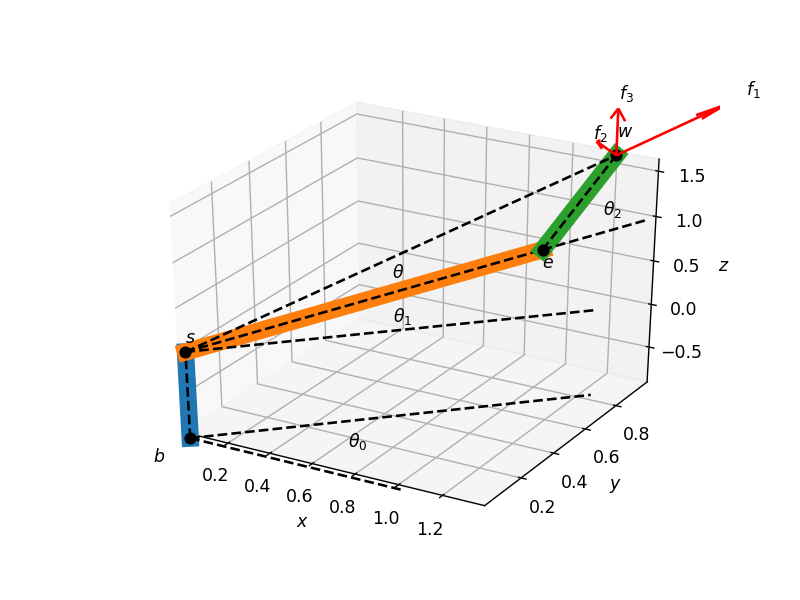

In [0]:
# 6R PUMA
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta0 = np.pi/5      # angles and link lengths
ell1 = 1.5
ell2 = 1
theta1 = np.pi/6
theta2 = np.pi/4

b = np.array([0,0,-1])   # base
s = np.array([0,0,0])    # shoulder

ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],linewidth=10)   # link 0, b to s
ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],'ko--')

e = np.array([ell1*np.cos(theta0)*np.cos(theta1), ell1*np.sin(theta0)*np.cos(theta1), 
              ell1*np.sin(theta1)])   # elbow

ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],linewidth=10)   # link 1, s to e
ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],'ko--')

w = e + np.array([ell2*np.cos(theta0)*np.cos(theta1+theta2), ell2*np.sin(theta0)*np.cos(theta1+theta2), 
                  ell2*np.sin(theta1+theta2)])   # wrist

ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],linewidth=10)   # link 2, e to w
ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],'ko--')

ax.plot3D([s[0],w[0]],[s[1],w[1]],[s[2],w[2]], 'k--')   # finish theta triangle

# paste a labeled frame at end
f1 = np.array([1,2,1])/np.sqrt(6)
f2 = np.array([-1,1,-1])/np.sqrt(3)
f3 = np.array([0,0,1])
F2 = ax.quiver([w[0],w[0],w[0]],[w[1],w[1],w[1]],[w[2],w[2],w[2]],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], 
               length=0.5, colors='r', arrow_length_ratio=.25)
tf1 = 0.6*f1 + w
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$')
tf2 = 0.6*f2 + w
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$')
tf3 = 0.6*f3 + w
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$')

ax.text3D(0, -.2, -1, '$b$')
ax.text3D(0, 0, 0.1, '$s$')
ax.text3D(e[0], e[1], e[2]-.2, '$e$')
ax.text3D(w[0], w[1], w[2]+.2, '$w$')

# add angle labels and helpful liness
ax.plot3D([b[0],b[0]+1], [b[1],b[1]],[b[2],b[2]],'k--')
ax.plot3D([b[0],ell1*np.cos(theta0)], [b[1],ell1*np.sin(theta0)],[b[2],b[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/5, b[2],'$\\theta_0$')

ax.plot3D([s[0],ell1*np.cos(theta0)], [s[1],ell1*np.sin(theta0)],[s[2],s[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.1,'$\\theta_1$')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.6,'$\\theta$')

Le = 1.3*e  # Long e
ax.plot3D([e[0],Le[0]], [e[1],Le[1]],[e[2],Le[2]],'k--')
ax.text3D(Le[0]*.9, Le[1]*.9, Le[2]*.9 + 0.2,'$\\theta_2$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.grid('on')
plt.show()

\begin{myfig}\label{fig:rob3} A 6 degree-of-freedom PUMA robot. It swings by $\theta_0$ at its base, $b$, by $\theta_1$ at its shoulder, $s$, by $\theta_2$ at its elbow, $e$, and by an additional 3 degrees-of-freedom at it's wrist, $w$. The orange link has length $\ell_1$ and the green link has length $\ell_2$. \end{myfig}

In terms of the stated angles and known link lengths, the positions of the marked joints in Figure \ref{fig:rob3} are

\begin{equation}\label{eq:pumadef}
s = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
e = \begin{bmatrix} \ell_1\cos(\theta_0)\cos(\theta_1)  \\ \ell_1\sin(\theta_0)\cos(\theta_1) \\ \ell_1\sin(\theta_1) \end{bmatrix}, \hskip 0.25in
w =  \begin{bmatrix} \ell_1\cos(\theta_0)\cos(\theta_1) + \ell_2\cos(\theta_0)\cos(\theta_1+\theta_2) \\ \ell_1\sin(\theta_0)\cos(\theta_1) + \ell_2\sin(\theta_0)\cos(\theta_1+\theta_2)\\ \ell_1\sin(\theta_1) + \ell_2\sin(\theta_1+\theta_2) \end{bmatrix}
\end{equation}

The **inverse problem** of moving from a known configuration, 
$\{\ov\theta_0,\ov\theta_1,\ov\theta_2,\ov f_1,\ov f_2, \ov f_3\}$, to a target configuration, $\{w,f_1, f_2, f_3\}$
is solved in three steps.

In the **first** step we find the base angle $\theta_0$ by taking the ratio of the first two components in $w$. In particular

\begin{equation}\label{eq:w3a}
  \frac{w_1}{w_0} = \tan(\theta_0)
\end{equation}

We then rotate the base by $\delta_0\equiv \theta_0-\ov\theta_0$ about the $z$-axis. This places the wrist in the proper plane and its frame at

\begin{equation}\label{eq:wfra2}
  (f_x,f_y, f_z) \equiv (K(e_z,\delta_0)\ov f_1, K(e_z,\delta_0)\ov f_2, K(e_z,\delta_0)\ov f_3)
\end{equation}

In the **second** step we recognize that links 1 and 2 lie in a plane and that rotation *in* this plane corresponds to rotation about the axis

\begin{equation}\label{eq:InK1}
  a = \begin{bmatrix} \sin(\theta_0) \\ -\cos(\theta_0) \\ 0 \end{bmatrix}
\end{equation}

perpendicular to this plane. We may determine the intermediate angle $\theta$ as in our inverse solution of the planar robot arm,

\begin{equation}\label{eq:ct}
  \cos(\theta) = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2\ell_1\ell_3}
\end{equation}

where $\ell_3=\|w\|$ is the distance from shoulder to wrist. With $\theta$ in hand it is a simple matter to deduce the shoulder and elbow angles, $\theta_1$ and $\theta_2$, from Figure \ref{fig:rob3} via the Law of Cosines. We then rotate the
shoulder by $\theta_1-\ov\theta_1$ and the elbow by $\theta_2-\ov\theta_2$. This action rotates the step-1 wrist frame,
by $\delta\equiv (\theta_1+\theta_2)-(\ov\theta_1+\ov\theta_2)$ about the axis, $a$ of (\ref{eq:ct}).
As such, the wrist frame becomes $(K(a,\delta)K(e_z,\delta_0)\ov f_1, K(a,\delta)K(e_z,\delta_0)\ov f_2, K(a,\delta)K(e_z,\delta_0)\ov f_3)$.


For the **third** and final step we  use the composite rotation, $\cK$, of (\ref{eq:EATot}) to map the step-2 wrist frame to the target wrist frame, $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:rob3} Implement these three steps, in code, in moving the PUMA from $\\{0,0,0,e_x,e_y,e_z\\}$ to 
$\\{w,-e_x,e_y,-e_z\\}$ where

\begin{equation}\label{eq:tw}
   w = \begin{bmatrix} 1/2 \\ 1/2 \\ 2 \end{bmatrix}
\end{equation}

assuming $\ell_1 = 1.5$ and $\ell_2 = 1$.

(a) Find $\theta, \theta_1, \theta_2$, and the rotation matrix $K(a,\delta)$.

(b) Find $\theta_0$ and the rotation matrix $K(e_z,\delta_0)$.

(c) Find the composite rotation, $\cK$, using the last code cell in the previous section, that brings the wrist frame to $(-e_x,e_y,-e_z)$.

(d) Confirm your calculations by graphing your results.

\end{exercise}


<IPython.core.display.Javascript object>


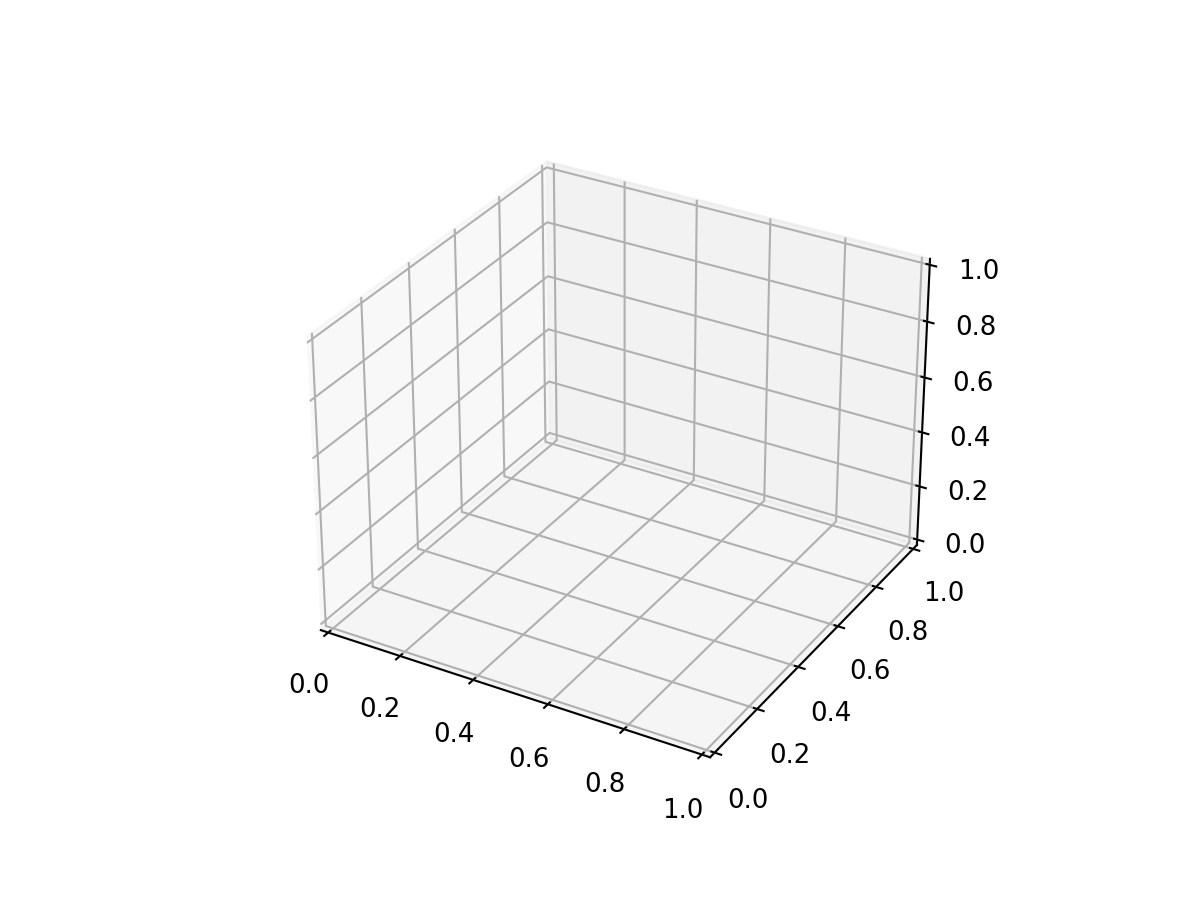

C:\Users\steve\AppData\Local\Temp\ipykernel_9060\454301429.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


ValueError: setting an array element with a sequence.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

fig = plt.figure(' ')
ax = fig.gca(projection='3d')

# reference configuration

f1b = np.array([1,0,0])   # ex
f2b = np.array([0,1,0])   # ey
f3b = np.array([0,0,1])   # ez

sb = np.array([0,0,0])
eb = np.array([1.5,0,0])
wb = np.array([2.5,0,0])

# step one
theta0 = np.pi/4
ez = np.array([0,0,1])
ezO = np.outer(ez, ez)
Xez = np.array([[0, -ez[2], ez[1]], [ez[2], 0, -ez[0]], [-ez[1], ez[0], 0]])
Kone = ezO + np.sin(theta0)*Xez + np.cos(theta0)*(np.eye(3)-ezO)
wone = Kone*wb
ax.plot3D([0, wone[0]], [0, wone[1]], [0, wone[2]], 'k')

## The Projective Plane 

The projective plane is the collection of lines in $\maR^3$ through the origin. These line take on physical significance when viewed as taking a planar "scene" onto a planar "canvas."

We start, see Figure \ref{fig:persp1}, with the **classical** setting of perspective painting.
We place the (red) scene on the plane $z=z_0$, the (blue) canvas on the plane $x=x_0$, the painter's (green) eye at the origin, $[0,0,0]$, and a pair of parallel (black) railroad tracks in our scene at $[x,\pm 1,z_0]$, where $x_a<x<x_b$.

We compute the projection of the negative ($y=-1$) track onto the canvas. Each point from the eye to this track lies on the line

\begin{equation}\label{eq:proj0}
  t[x,-1,z_0]
\end{equation}

This line hits the canvas when $tx=x_0$, i.e., when $t=x_0/x$, and so hits the canvas at

\begin{equation}\label{eq:projt}
    (x_0/x)[x, -1, z_0] = [x_0, -x_0/x, z_0x_0/x]
\end{equation}

and so, on the canvas plane ($x=x_0$) we find the (dashed) line $z=-z_0y=2y$ using $z_0=-2$ as in the code example below.

<IPython.core.display.Javascript object>


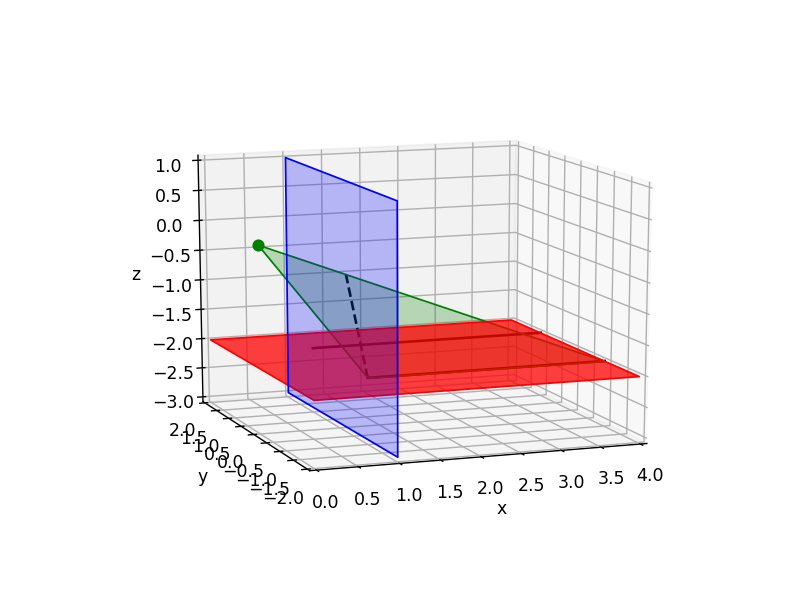

In [72]:
# painter perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0, 4, 4, 0]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = 1
# create the canvas plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1, z0+3, z0+3, z0-1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([x0, 4], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([x0, 4], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the painter's eye
#ax.plot([0, x0], [0, 0], [0, 0], 'g')   # eye into picture

# create plane through eye and right track
x = [0, x0, 4]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.plot([x0, x0], [-1, -x0/4], [z0, x0*z0/4], 'k--')   # right track projected 

ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp1} The black line in the red scene is projected onto the dashed black line on the blue canvas by following straight lines from the track to the painter's eye. Please run and rotate to explore the interplay of point, line, and plane. \end{myfig}

We next shift our perspective from painter to camera, although with the image plane still perpendicular to the scene. In this case, see Figure \ref{fig:persp2}, the canvas is the image plane behind the lens.

<IPython.core.display.Javascript object>


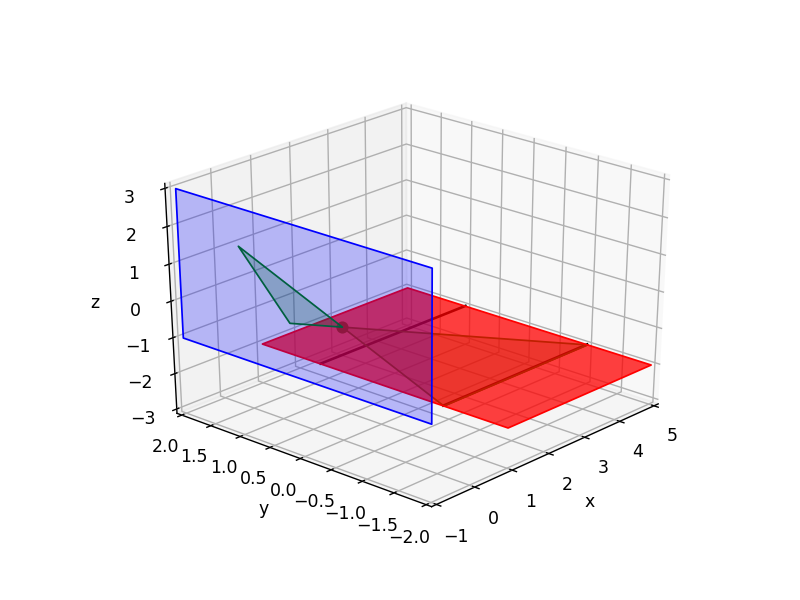

In [73]:
# camera perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0+1, 4+1, 4+1, 0+1]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = -1
# create the camera plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1+2, z0+3+2, z0+3+2, z0-1+2]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([1, 5], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([1, 5], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the camera lens

# create bowtie through eye and right track onto image plane
x = [0, 5, 1]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))
x = [0, x0, x0]
y = [0, -x0, -x0/5]
z = [0, z0*x0, z0*x0/5]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.set_xlim(x0, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3+2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp2} The black line in the red scene is projected onto the blue image plane by following straight lines from the track through the camera's lens. Please run and rotate to explore the interplay of point, line, and plane. Do you see that although the projection remains $z=2y$, that the track is reflected in both the $y$ and $z$ directions in comparison with our previous figure? \end{myfig}

\begin{exercise}\label{ex:persp}
Modify the last two code cells to add the green triangles associated with the projection of the other track.
\end{exercise}

As cameras are rarely perpendicular to their scenes we consider the Central Projection, through the origin, of one plane onto another. We constructed our first plane, in Figure \ref{fig:vperp} as the collection of points perpendicular to a given unit vector, $n$.
As our scene and image planes need not contain the origin we allow translates. To be precise, given a unit vector $n\in\maR^3$
and a translate $b\in\maR^3$ we define

\begin{equation}\label{eq:P0}
  n^\perp = \{p\in\maR^3: n^Tp = 0\} \and
 P = b + n^\perp = \{b + p: n^Tp = 0\}
\end{equation}

Now if we simply set $c=n^Tb$ we find

\begin{equation}\label{eq:P1}
 P = \{p\in\maR^3: n^Tp = c\}
\end{equation}

We will also benefit from viewing the base plane, $n^\perp$, as the **span** of any two of its perpendicular elements, say $q$ and $r$. By this we mean

\begin{equation}\label{eq:aperp}
 n^\perp = \{xq + yr: x,y\in\maR\}
\end{equation}

and speak of $\{q,r\}$ as a **basis** for $n^\perp$.

This then permits us to express our plane as

\begin{equation}\label{eq:P2}
 P = \{b+xq + yr: x,y\in\maR \}.
\end{equation}

As such we can express a plane via its normal and translate, or via its basis and translate. With these two characterizations of $P$ we then prescribe two similar characterizations of $P'$, namely

\begin{equation}\label{eq:Pp}
 P' = \{b'+uq' + vr': u,v\in\maR \} = \{p'\in\maR^3: n'^Tp' = c' \equiv n'^Tb'\}
\end{equation}

We have offer concrete examples of these planes in Figure \ref{fig:CentProj}.

<IPython.core.display.Javascript object>


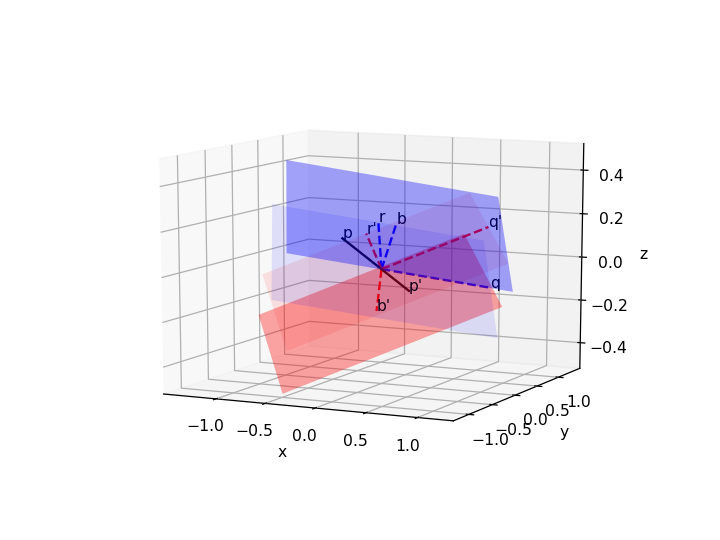

In [1]:
# Central Projection of P onto P'
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 11, azim = -64)

# build the P plane

phi = np.pi/6 
a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
aaT = np.outer(a, a)
Xa = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
K = aaT + np.sin(phi)*Xa + np.cos(phi)*(np.eye(3)-aaT)

V = np.array([[-1,1,1,-1],[-1,-1,1,1],[0,0,0,0]])  # base vertices in z=0 plane
KV = K@V   # rotated plane
n = np.array([0,0,1])    # normal to base plane
n = K@n    # normal to rotated plane

x = KV[0,:]
y = KV[1,:]
z = KV[2,:]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.1))
q = np.array([1,0,0])
q = K@q
ax.plot3D([0,q[0]],[0,q[1]],[0,q[2]],'b--')
ax.text3D(q[0],q[1],q[2],'q')
r = np.array([0,1,0])
r = K@r
ax.plot3D([0,r[0]],[0,r[1]],[0,r[2]],'b--')
ax.text3D(r[0],r[1],r[2],'r')

b = np.array([0.1,0.1,0.2])
x = KV[0,:] + b[0]*np.ones(x.shape)
y = KV[1,:] + b[1]*np.ones(x.shape)
z = KV[2,:] + b[2]*np.ones(x.shape)
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.35))
ax.plot3D([0,b[0]],[0,b[1]],[0,b[2]],'b--')
ax.text3D(b[0],b[1],b[2],'b')

p = np.array([-.5, -.5, 0])
p = K@p + b    # featured point on P

# now the P' plane

phi = np.pi/5  # *np.random.rand(1)
a = np.array([1,-1,4])/np.sqrt(18)   # make a unit vector
aaT = np.outer(a, a)
Xa = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
K = aaT + np.sin(phi)*Xa + np.cos(phi)*(np.eye(3)-aaT)

V = np.array([[-1,1,1,-1],[-1,-1,1,1],[0,0,0,0]])
KV = K@V
n = np.array([0,0,1])    # normal to base plane
n = K@n    # normal to rotated plane

x = KV[0,:] 
y = KV[1,:] 
z = KV[2,:] 
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'r', alpha = 0.1))
q = np.array([1,0,0])
q = K@q
ax.plot3D([0,q[0]],[0,q[1]],[0,q[2]],'r--')
ax.text3D(q[0],q[1],q[2],"q'")
r = np.array([0,1,0])
r = K@r
ax.plot3D([0,r[0]],[0,r[1]],[0,r[2]],'r--')
ax.text3D(r[0],r[1],r[2],"r'")

b = np.array([-0.1,0.1,-0.2])
x = KV[0,:] + b[0]*np.ones(x.shape)
y = KV[1,:] + b[1]*np.ones(x.shape)
z = KV[2,:] + b[2]*np.ones(x.shape)
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'r', alpha = 0.35))
ax.plot3D([0,b[0]],[0,b[1]],[0,b[2]],'r--')
ax.text3D(b[0],b[1],b[2],"b'")

pp = (np.dot(n,b)/np.dot(n,p))*p   # p', the central projection of p
ax.plot3D([p[0],pp[0]],[p[1],pp[1]],[p[2],pp[2]],'k')
ax.text3D(p[0],p[1],p[2],'p')
ax.text3D(pp[0],pp[1],pp[2],"p'")

ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(y), np.max(y))
ax.set_zlim(-.5, .5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:CentProj} Central Projection of the point $p$ from the $P$ plane (dark blue) onto the point $p'$ of the $P'$ plane (dark red). We also illustrate the two base planes, $n^\perp$ (light plue) with its basis vectors $q$ and $r$, and $n'^\perp$ (light red) with its basis vectors $q'$ and $r'$. The final components are the translation vectors $b$ and $b'$ that yield $P=b+n^\perp$ and $P'=b'+n'^\perp$. Please rotate and zoom to bring individual pieces into focus. \end{myfig}

Now as the projection of $p\in P$ is a point $p'\in P'$ on the line through $p$ it follows that

\begin{equation*}
   p' = t p \implies c' = n'^Tp' = t n'^Tp \implies t = \frac{c'}{n'^Tp}
   \hskip 0.25in\hbox{and so}\hskip 0.25in p' = \frac{c'}{n'^Tp}p
\end{equation*}

or, in terms of their basis vectors

\begin{equation}\label{eq:Pp2}
  uq' + vr' + b' = \frac{c'(xq + yr + b)}{n'^T(xq + yr + b)}
\end{equation}

Now taking the inner product of each side of (\ref{eq:Pp2}) with $q'$ we find

\begin{equation*}
  u+q'^Tb' = \frac{c'(xq'^Tq + yq'^Tr + q'^Tb)}{xq^Tn' + yr^Tn' + b^Tn'}
\end{equation*}

As each of these inner products are fixed scalars we introduce a convenient renaming and find

\begin{equation}\label{eq:Pu}
  u = \frac{h_{00} x + h_{01} y + h_{02}}{h_{20} x + h_{21} y + h_{22}}
\end{equation}

If we instead take the inner product of each side of (\ref{eq:Pp2}) with $r'$ we find

\begin{equation}\label{eq:Pv}
  v = \frac{h_{10} x + h_{11} y + h_{12}}{h_{20} x + h_{21} y + h_{22}}
\end{equation}

that is, $(u,v)$ is a fractional linear transformation of $(x,y)$. This naming, labeling and common denominator is meant to remind you of our work on the projective line in the previous notebook. To extend those ideas to $\maR^3$ we denote, for each $p\in\maR^3$, the line through $p$ by

\begin{equation*}
  \ell(p) \equiv \{ap:a\in\maR\}
\end{equation*}

and the collection of all lines by

\begin{equation}\label{eq:PPlane}
  \maP^2 \equiv \{\ell(p):p\in\maR^3\}
\end{equation}

As was the case with $\maP^1$, after graphing a few lines, we recognize a more convenient representation of $\maP^2$.

<IPython.core.display.Javascript object>


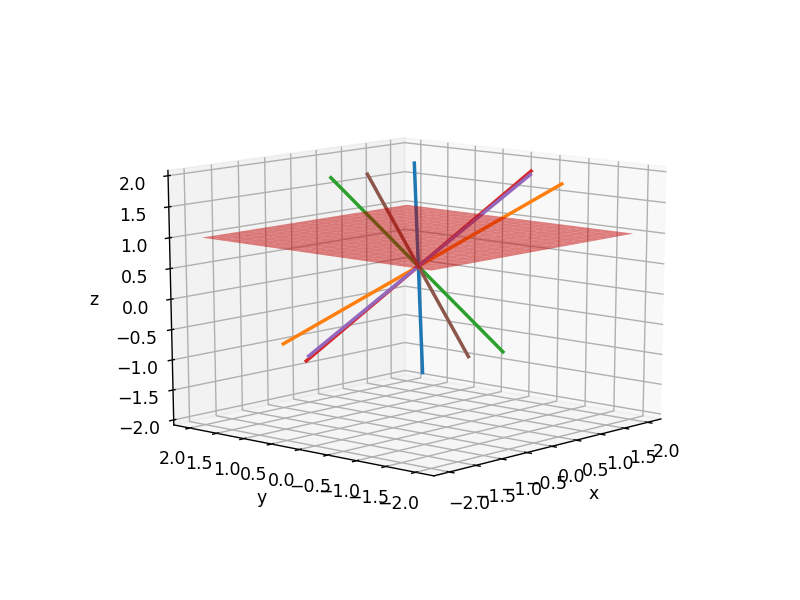

400


In [84]:
# The Projective Plane
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square
Z = np.ones(X.shape)  # height = 1
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')              

for i in range(6):
    a = np.random.randn(3)
    ax.plot3D([-a[0], a[0]], [-a[1], a[1]], [-1, 2],linewidth=2)   # plot the a vector
    
ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:PPlane} Six random lines puncturing the plane $\{[x,y,z]:z=1\}$.\end{myfig}

From Figure \ref{fig:PPlane}, we note that every line through the origin, except the ones in the plane $\{z=0\}$, crosses the plane $\{[x,y,1]:x,y\in\maR\}$ at a unique pair $[x,y]$. As such

\begin{equation}\label{eq:PLineH}
  \maP^2 = \{\ell([x,y,1]):x,y\in\maR\} \cup \{\ell([x,y,0]):x,y\in\maR\} 
\end{equation}

We interpret the first piece as simply $\maR^2$ and the second as "the lines at infinity." As the latter is precisely the projective line we arrive at

\begin{equation}\label{eq:PLineC}
  \boxed{\maP^2 = \maR^2 \cup \maP^1}
\end{equation}

Now, in this context, we recognize (\ref{eq:Pu}) and (\ref{eq:Pv}) as

\begin{equation}\label{eq:projH}
\eqalign{\ell([u,v,1]) 
&= \ell([h_{00}x + h_{01}y + h_{02}, h_{10}x + h_{11}y + h_{12}, h_{20}x + h_{21}y + h_{22}]) \cr
&= \ell\left(\left[\frac{h_{00}x + h_{01}y + h_{02}}{h_{20}x + h_{21}y + h_{22}}, \frac{h_{10}x + h_{11}y + h_{12}}{h_{20}x + h_{21}y + h_{22}}, 1 \right]\right) }
\end{equation}

We now demonstrate how to use this result to "correct" a camera's projective view. 

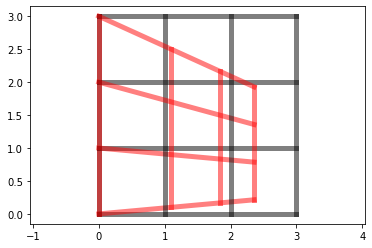

In [121]:
# Inverting a Projective Transformation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[8,0,0],[-1,11,0],[-2,0,11]])   # this corrects (inverts) the projective transformation
Hi = np.linalg.inv(H)                         # so this must be the original projective transformation

NP = 4   # number of lines
x = np.arange(NP)

for i in range(NP):
    y = i*np.ones(NP)
    plt.plot(x,y,'k',linewidth=5, alpha=0.5)
    p = np.vstack((x,y,np.ones(NP)))
    Hp = Hi@p
    plt.plot(Hp[0,:]/Hp[2,:], Hp[1,:]/Hp[2,:],'r',linewidth=5, alpha=0.5)  # horizontal lines
    
    plt.plot(y,x,'k',linewidth=5, alpha=0.5)    # exchange x and y
    p = np.vstack((y,x,np.ones(NP)))
    Hp = Hi@p
    plt.plot(Hp[0,:]/Hp[2,:], Hp[1,:]/Hp[2,:],'r',linewidth=5, alpha=0.5)  # vertical lines
    
plt.axis('equal');

\begin{myfig}\label{fig:CorrectProj} Given the projected red grid we correct it, via the projective transformation in (\ref{eq:Hfin2}), to the regular black grid. \end{myfig}

With regard to Figure \ref{fig:CorrectProj} we use (\ref{eq:projH}) to construct a Projective Transformation that takes the vertices of the lower left red trapezoid

\begin{equation}\label{eq:sq1}
   (x_1,y_1) = (0,0), \hskip 0.2in
   (x_2,y_2) = (11/10,1/10), \hskip 0.2in
   (x_3,y_3) = (11/10,9/10), \hskip 0.2in
   (x_4,y_4) = (0,1)
\end{equation}

to the vertices of the lower left black square

\begin{equation}\label{eq:sq0}
   (u_1,v_1) = (0,0), \hskip 0.2in
   (u_2,v_2) = (1,0), \hskip 0.2in
   (u_3,v_3) = (1,1), \hskip 0.2in
   (u_4,v_4) = (0,1)
\end{equation}

Their substitution in (\ref{eq:projH}) brings

\begin{equation}\label{eq:ptrans}
  u_i(h_{20}x_i+h_{21}y_i+h_{22}) = h_{00}x_i+h_{01}y_i + h_{02} \\
  v_i(h_{20}x_i+h_{21}y_i+h_{22}) = h_{10}x_i+h_{11}y_i + h_{12}
\end{equation}

If we stack these 4 sets of 2 we find a system for $H$

\begin{equation}\label{eq:H0}
 \eqalign{0 &= h_{02} \cr 0 &= h_{12} \cr} 
 \\
 \eqalign{h_{20}(11/10)+h_{21}/10+h_{22} &= h_{00}(11/10)+h_{01}/10 + h_{02} \cr
  0 &= h_{10}(11/10)+h_{11}/10 + h_{12} \cr} 
  \\
  \eqalign{h_{20}(11/10)+h_{21}(9/10)+h_{22} &= h_{00}(11/10)+h_{01}(9/10) + h_{02} \cr
  h_{20}(11/10)+h_{21}(9/10)+h_{22} &= h_{10}(11/10)+h_{11}(9/10) + h_{12} \cr}
  \\
  \eqalign{0 &= h_{01} + h_{02} \cr
  h_{21}+h_{22} &= h_{11} + h_{12} \cr}
\end{equation}

We note that the 1st, 2nd, and 7th equations in (\ref{eq:H0}) render

\begin{equation*}
 h_{01}=h_{02}=h_{12} = 0 
\end{equation*}

and that this information, when used in the 4th equation renders

\begin{equation*}
  h_{10} = -h_{11}/11
\end{equation*}

while the 5th and 6th equations render

\begin{equation*}
  h_{00} = 8h_{11}/11
\end{equation*}

which causes the 3rd and 5th equations to yield

\begin{equation*}
  h_{21} = 0
\end{equation*}

and so the 8th equation becomes

\begin{equation*}
  h_{22} = h_{11}
\end{equation*}

which, finally, causes the 3rd equation to reveal

\begin{equation*}
  h_{20} = -2h_{11}/11.
\end{equation*}

On collecting these facts we find

\begin{equation}\label{eq:Hfin}
H = h_{11}\begin{bmatrix} 8/11 & 0 & 0 \\ -1/11 & 1 & 0 \\ -2/11 & 0 & 1 \end{bmatrix}
\end{equation}

We now note from (\ref{eq:ptrans}) that multiplication of $H$ by a common scalar does not change the system of equations. This then permits us to make the convenient choice $h_{11}=11$ and arrive at the integer matrix

\begin{equation}\label{eq:Hfin2}
H = \begin{bmatrix} 8 & 0 & 0 \\ -1 & 11 & 0 \\ -2 & 0 & 11 \end{bmatrix}
\end{equation}

This is the transformation that sends the projected red grid to the regular black grid in Figure \ref{fig:CorrectProj}.

In subsequent notebooks we will develop systematic means for solving systems of equations like (\ref{eq:H0}). As our particular system has a geometric provenance there are even approaches, see e.g., <a href="http://www.ams.org/publicoutreach/feature-column/fc-2013-03">Austin</a> that retain a geometric flavor.

\begin{exercise}\label{ex:seeP2}
In our previous notebook we visualized the projective line as a circle, and went on to visualize the action of $\maR^{2\times 2}$ on $\maP^1$ as a closed curve on a torus. The visualization of $\maP^2$ requires considerably greater imagination. As one clue to its strangeness please show that parallel lines always intersect.
\end{exercise}